# Word Analysis
Check distribution and other stuff. Analyse the articles by word counts, word importances and other features!

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import pickle
# Add functions path
import sys
sys.path.append('../Functions')
from datasets import load_stratified_dataset
from plots_fabi import *

***
### Check sites the news are from

In [2]:
df = load_stratified_dataset(path='../Datasets/dataset_categories/dataset_categories_train_sites_unbalanced.csv', labels='category', samples_per_label=1000000)

Smallest sample size in dataset is 12026 samples!


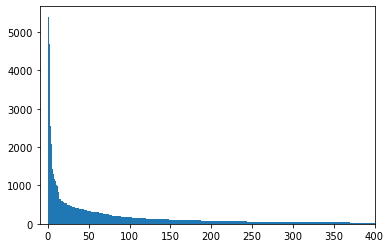

There are 1544 different publishers in the dataset!
The top five publishers are given below:
yahoo.com              : 5402
cbs8.com               : 4698
reuters.com            : 2553
travelandtourworld.com : 2076
freshnews.com          : 1418
Median: 10.0
Mean:   54.5


In [3]:
#df.loc[X_train.index.values].site.value_counts().head(10)
#df.loc[X_test.index.values].site.value_counts()
plt.bar(np.arange(1,df.site.unique().shape[0]+1), df.site.value_counts(), width=2)
plt.xlim(-10,400)
plt.show()
print('There are {} different publishers in the dataset!'.format(df.site.unique().shape[0]))
print('The top five publishers are given below:\n{}'.format('\n'.join('{: <23}: {}'.format(key, val) for key, val in zip(df.site.value_counts().keys()[:5], df.site.value_counts().values[:5]))))
print('Median: {}\nMean:   {:.1f}'.format(df.site.value_counts().median(), df.site.value_counts().mean()))

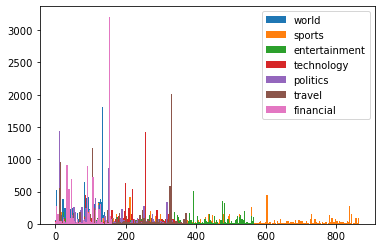

In [4]:
category = 'politics'
for category in df.category.unique():
    plt.bar(np.arange(1,df[df.category == category].site.unique().shape[0]+1), df[df.category == category].site.value_counts(sort=False), width=4, label=category)

plt.legend();

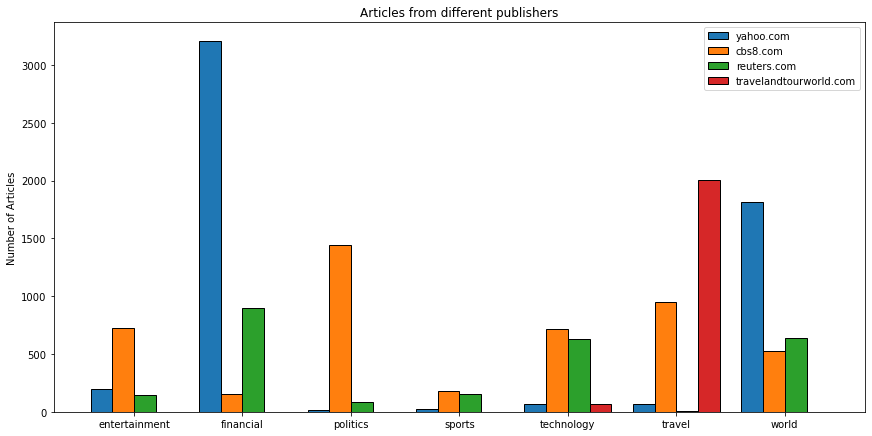

In [5]:
x = df.category.unique()
x.sort()
y = {}
for site in ['yahoo.com', 'cbs8.com', 'reuters.com', 'travelandtourworld.com']:
    counts = df[df.site == site].category.value_counts()
    keys = list(counts.keys())
    vals = list(counts.values)
    # Insert missing values
    if len(keys) < len(x):
        for x_value in x:
            if x_value not in keys:
                keys.append(x_value)
                vals.append(0)
    keys, vals = zip(*sorted(zip(keys, vals)))
    y[site] = vals
#bar_adjacent_labels(x, y)

n_indices = len(x)
ind = np.arange(n_indices)

width = 0.2

fig, ax = plt.subplots(figsize=(12,6))
fig.tight_layout()

ax.bar(ind - width*3/2, list(y.values())[0], width, label=list(y.keys())[0], edgecolor='black')
ax.bar(ind - width/2, list(y.values())[1], width, label=list(y.keys())[1], edgecolor='black')
ax.bar(ind + width/2, list(y.values())[2], width, label=list(y.keys())[2], edgecolor='black')
ax.bar(ind + width*3/2, list(y.values())[3], width, label=list(y.keys())[3], edgecolor='black')
ax.set_xticks(ind)
ax.set_xticklabels(x)
ax.legend()
ax.set_ylabel('Number of Articles')
ax.set_title('Articles from different publishers');

***
The plots show, that most news come from few publishers, while most publishers only bring some news. Also publishers bring different amount of news in different categories, what can lead to some large bias that is introduced into the dataset. __Try to bring more balanced publishers to dataset__. (See next chapter)

***
### After balancing out the dataset

In [6]:
df = load_stratified_dataset(path='../Datasets/dataset_categories/dataset_categories_train.csv', labels='category', samples_per_label=1000000)

Smallest sample size in dataset is 12026 samples!


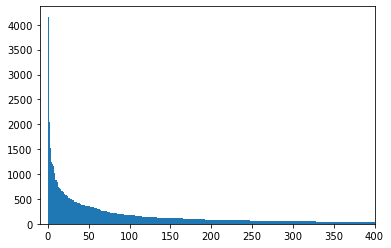

There are 1651 different publishers in the dataset!
The top five publishers are given below:
cbs8.com               : 4162
reuters.com            : 2054
yahoo.com              : 1514
usnews.com             : 1247
prweb.com              : 1197
Median: 14.0
Mean:   51.0


In [7]:
#df.loc[X_train.index.values].site.value_counts().head(10)
#df.loc[X_test.index.values].site.value_counts()
plt.bar(np.arange(1,df.site.unique().shape[0]+1), df.site.value_counts(), width=2)
plt.xlim(-10,400)
plt.show()
print('There are {} different publishers in the dataset!'.format(df.site.unique().shape[0]))
print('The top five publishers are given below:\n{}'.format('\n'.join('{: <23}: {}'.format(key, val) for key, val in zip(df.site.value_counts().keys()[:5], df.site.value_counts().values[:5]))))
print('Median: {}\nMean:   {:.1f}'.format(df.site.value_counts().median(), df.site.value_counts().mean()))

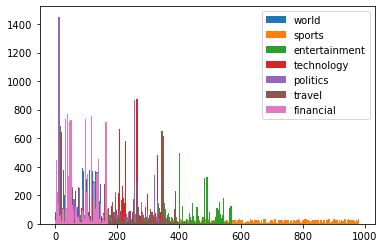

In [8]:
category = 'politics'
for category in df.category.unique():
    plt.bar(np.arange(1,df[df.category == category].site.unique().shape[0]+1), df[df.category == category].site.value_counts(sort=False), width=4, label=category)

plt.legend();

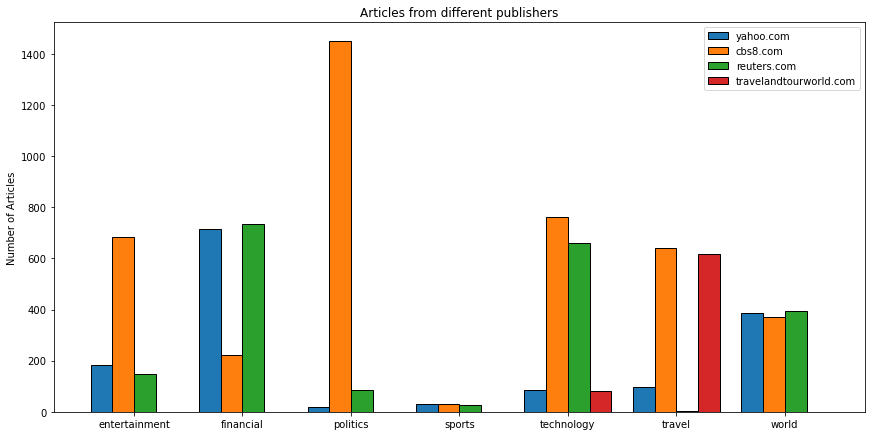

In [9]:
x = df.category.unique()
x.sort()
y = {}
for site in ['yahoo.com', 'cbs8.com', 'reuters.com', 'travelandtourworld.com']:
    counts = df[df.site == site].category.value_counts()
    keys = list(counts.keys())
    vals = list(counts.values)
    # Insert missing values
    if len(keys) < len(x):
        for x_value in x:
            if x_value not in keys:
                keys.append(x_value)
                vals.append(0)
    keys, vals = zip(*sorted(zip(keys, vals)))
    y[site] = vals
#bar_adjacent_labels(x, y)

n_indices = len(x)
ind = np.arange(n_indices)

width = 0.2

fig, ax = plt.subplots(figsize=(12,6))
fig.tight_layout()

ax.bar(ind - width*3/2, list(y.values())[0], width, label=list(y.keys())[0], edgecolor='black')
ax.bar(ind - width/2, list(y.values())[1], width, label=list(y.keys())[1], edgecolor='black')
ax.bar(ind + width/2, list(y.values())[2], width, label=list(y.keys())[2], edgecolor='black')
ax.bar(ind + width*3/2, list(y.values())[3], width, label=list(y.keys())[3], edgecolor='black')
ax.set_xticks(ind)
ax.set_xticklabels(x)
ax.legend()
ax.set_ylabel('Number of Articles')
ax.set_title('Articles from different publishers');

***
The median rised from 10 to 14. Categories are better balanced over publishers, but still there is a bias inside. Try with less data.

***
### After balancing out the dataset (small dataset)

In [10]:
df = load_stratified_dataset(path='../Datasets/dataset_categories/dataset_categories_train_small.csv', labels='category', samples_per_label=1000000)

Smallest sample size in dataset is 2619 samples!


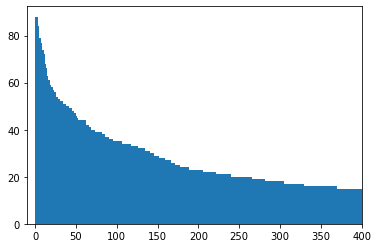

There are 1709 different publishers in the dataset!
The top five publishers are given below:
indiatimes.com         : 88
cbs8.com               : 88
yahoo.com              : 85
reuters.com            : 84
thetimes.co.uk         : 79
Median: 7.0
Mean:   10.7


In [11]:
#df.loc[X_train.index.values].site.value_counts().head(10)
#df.loc[X_test.index.values].site.value_counts()
plt.bar(np.arange(1,df.site.unique().shape[0]+1), df.site.value_counts(), width=2)
plt.xlim(-10,400)
plt.show()
print('There are {} different publishers in the dataset!'.format(df.site.unique().shape[0]))
print('The top five publishers are given below:\n{}'.format('\n'.join('{: <23}: {}'.format(key, val) for key, val in zip(df.site.value_counts().keys()[:5], df.site.value_counts().values[:5]))))
print('Median: {}\nMean:   {:.1f}'.format(df.site.value_counts().median(), df.site.value_counts().mean()))

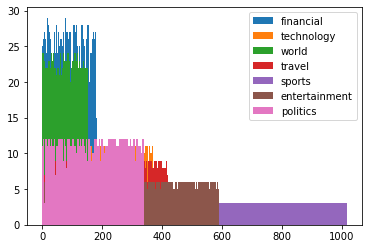

In [12]:
category = 'politics'
for category in df.category.unique():
    plt.bar(np.arange(1,df[df.category == category].site.unique().shape[0]+1), df[df.category == category].site.value_counts(sort=False), width=4, label=category)

plt.legend();

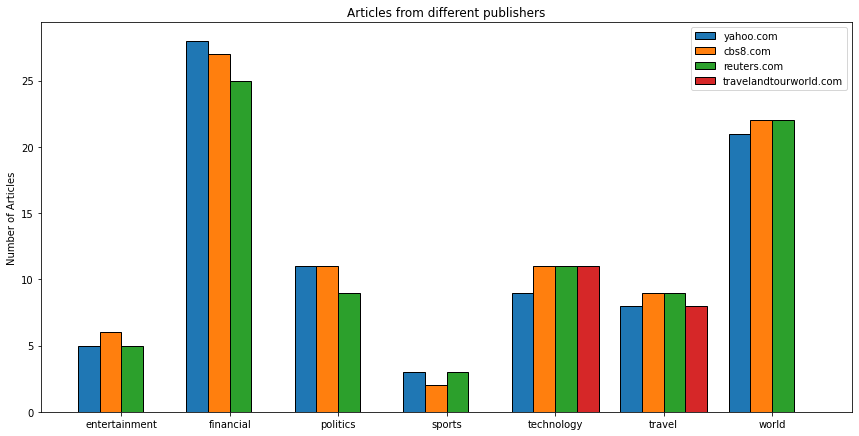

In [13]:
x = df.category.unique()
x.sort()
y = {}
for site in ['yahoo.com', 'cbs8.com', 'reuters.com', 'travelandtourworld.com']:
    counts = df[df.site == site].category.value_counts()
    keys = list(counts.keys())
    vals = list(counts.values)
    # Insert missing values
    if len(keys) < len(x):
        for x_value in x:
            if x_value not in keys:
                keys.append(x_value)
                vals.append(0)
    keys, vals = zip(*sorted(zip(keys, vals)))
    y[site] = vals
#bar_adjacent_labels(x, y)

n_indices = len(x)
ind = np.arange(n_indices)

width = 0.2

fig, ax = plt.subplots(figsize=(12,6))
fig.tight_layout()

ax.bar(ind - width*3/2, list(y.values())[0], width, label=list(y.keys())[0], edgecolor='black')
ax.bar(ind - width/2, list(y.values())[1], width, label=list(y.keys())[1], edgecolor='black')
ax.bar(ind + width/2, list(y.values())[2], width, label=list(y.keys())[2], edgecolor='black')
ax.bar(ind + width*3/2, list(y.values())[3], width, label=list(y.keys())[3], edgecolor='black')
ax.set_xticks(ind)
ax.set_xticklabels(x)
ax.legend()
ax.set_ylabel('Number of Articles')
ax.set_title('Articles from different publishers');

***
The dataset is small, but very well distributed!

***
### SVC different categories

In [14]:
df = load_stratified_dataset(path='../Datasets/dataset_categories/dataset_categories_train.csv', labels='category', samples_per_label=1000000)

Smallest sample size in dataset is 12026 samples!


In [15]:
# Load training set
#df = load_stratified_dataset(path='../Datasets/dataset_categories/dataset_categories_train.csv', labels='category', samples_per_label=2000)
# Shuffle dataset
df = df.sample(frac=1).reset_index(drop=True)
mid = int(df.shape[0]/2)
X_train, y_train = df[:mid].text, df[:mid].category

# Load test set for every category
df = df[mid:]
test_set = {}
for i in df.category.unique():
    test_set[i] = df[df['category'] == i].text.values

In [16]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1',
                            ngram_range=(1,2), stop_words='english')
# Fit model
clf = LinearSVC(random_state=42, dual=False, max_iter=10000, C=0.4)
X_train_tfidf = tfidf.fit_transform(X_train)
clf.fit(X_train_tfidf, y_train)

predictions = []
# Get accuracies for categories
for key, value in test_set.items():
    X_test_tfidf = tfidf.transform(value)
    y_test = np.full(value.shape[0], key)
    print('Score for category {: <13}:   {:.1f} %'.format(key, clf.score(X_test_tfidf, y_test)*100))
    # Get Predictions
    cat, val = np.unique(clf.predict(X_test_tfidf), return_counts=True)
    #pred = sorted(list(zip(cat, (val/y_test.shape[0]*100).round(1))) , key=lambda x: x[1], reverse=True)
    predictions.append((cat, (val/y_test.shape[0]*100).round(1)))

Score for category sports       :   89.4 %
Score for category financial    :   81.4 %
Score for category technology   :   80.8 %
Score for category travel       :   81.2 %
Score for category entertainment:   81.2 %
Score for category world        :   74.6 %
Score for category politics     :   72.1 %


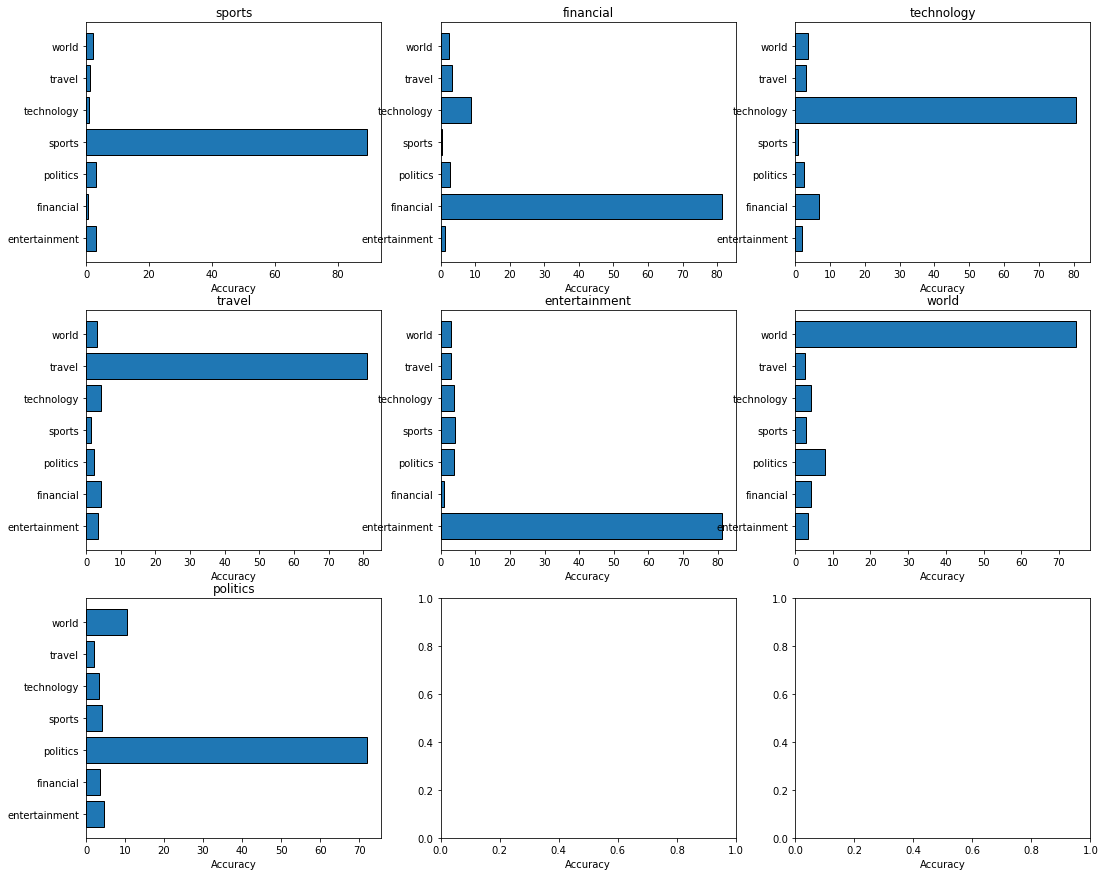

In [17]:
fig, ax = plt.subplots(3,3,figsize=(18,15))
simple_h_bar(predictions[0][0], predictions[0][1], ax=ax[0][0], title=predictions[0][0][np.argmax(predictions[0][1])])
simple_h_bar(predictions[1][0], predictions[1][1], ax=ax[0][1], title=predictions[1][0][np.argmax(predictions[1][1])])
simple_h_bar(predictions[2][0], predictions[2][1], ax=ax[0][2], title=predictions[2][0][np.argmax(predictions[2][1])])
simple_h_bar(predictions[3][0], predictions[3][1], ax=ax[1][0], title=predictions[3][0][np.argmax(predictions[3][1])])
simple_h_bar(predictions[4][0], predictions[4][1], ax=ax[1][1], title=predictions[4][0][np.argmax(predictions[4][1])])
simple_h_bar(predictions[5][0], predictions[5][1], ax=ax[1][2], title=predictions[5][0][np.argmax(predictions[5][1])])
simple_h_bar(predictions[6][0], predictions[6][1], ax=ax[2][0], title=predictions[6][0][np.argmax(predictions[6][1])])

for a1 in ax:
    for a2 in a1:
        a2.set_xlabel('Accuracy')

***
All categories seem to be predicted equally well, except politics and world. Both are most false predicted in each other. Categories are most probably too close together, hard to separate.

***
## Word probabilities
Calculate the count of each word in each article.\
Then use naive bayes to get the probability of a word to be in a class (category).

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

text = df.text_lem.values
# Number of times the words have to occur at least
min_df=20

# ngram_range only use 1 word, stop_words=english remove common words(eg: a, an, the)
# CountVectorizer ignores difference between lower and upper case and puncuation
vect = CountVectorizer(ngram_range=(1,2), stop_words='english', min_df=min_df)

# CountVectorizer converts list of strings to matrix with: rows = observation, columns = terms in text, values=count/document
X = vect.fit_transform(text)
words = vect.get_feature_names()


# Turn result to dummies, so that columns are in correct order
d = {}
count=0
for i in df.category.unique():
    d[i] = count
    count += 1
df['category_num'] = [d[i] for i in df.category]

y = df.category_num

# Remove alpha to prevent bias
clf = MultinomialNB(alpha=1.e-10)
clf.fit(X,y)

# Get logarithmic probabilities, save in dataframe
likelihood_df_raw = pd.DataFrame(clf.feature_log_prob_.transpose(),columns=df.category.unique(), index=words)

***
## Word importances for every category
Calculate the word importances for each category by difference of probability of a word in one category to the probability of the word in each other category.

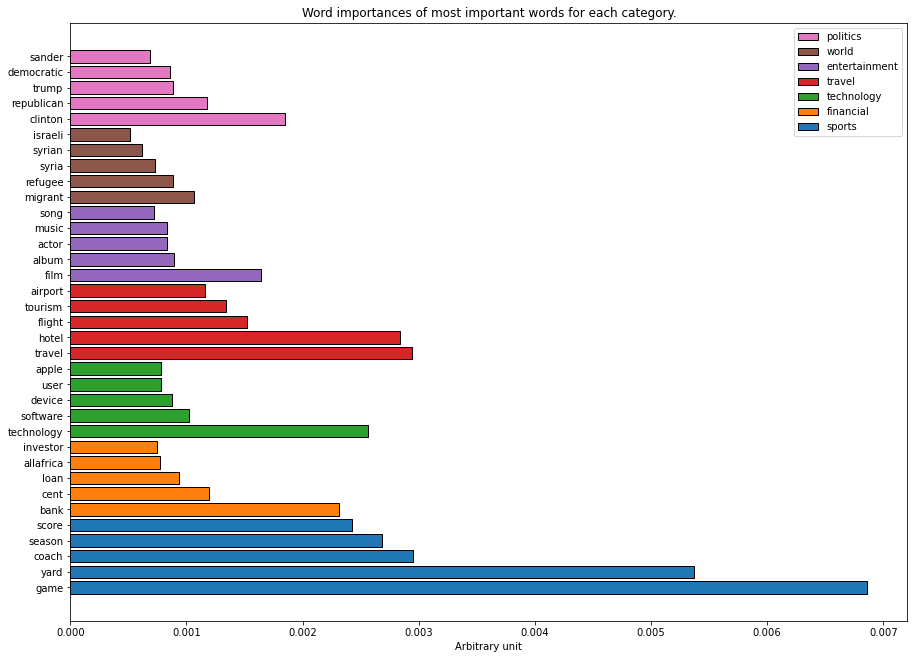

In [19]:
num_words = 5 # num_words
fig = plt.figure(figsize=(15,11))
ax = plt.subplot(111)
likelihood_df = {}
for category in df.category.unique():
    # Get probability of words in one category - probability in all other categories
    likelihood_df[category] = np.exp(likelihood_df_raw[category]) - np.sum(np.exp(likelihood_df_raw.drop(category, axis=1)), axis=1)
    
    # Sort likelihood
    likelihood_df[category] = likelihood_df[category].sort_values(ascending=False)

    # Get top likely words
    top = likelihood_df[category][:num_words]
    
    ax.barh(top.index, top, edgecolor='black', label=category)

ax.set_title('Word importances of most important words for each category.')
ax.set_xlabel('Arbitrary unit')
    
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1]);

***
## Word embedding
Save Word embeddings with different vocabulary words and sizes.

In [20]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
import gensim

#### Create, fit and save embedding vectors

In [21]:
# Embedding dimension
emb_dims = []
# Vocabulary size
vocab_sizes = [30]

for vocab_size in vocab_sizes:
    # Get vocabulary
    vocabulary = set()
    for category in likelihood_df.keys():
        vocabulary.update(likelihood_df[category].index[:vocab_size])
    vocabulary = list(vocabulary)

    for emb_dim in emb_dims:

        # Name of embedding
        name = 'voc_' + str(len(vocabulary)) + '_dim_' + str(emb_dim)

        # Size is embedding dimension
        model = Word2Vec(size=emb_dim, max_vocab_size=10000, window=5, min_count=1, workers=1)
        # Set vocabulary
        model.build_vocab(sentences=[vocabulary])
        # Train model on lemmatized articles
        model.train(df.text_lem, total_examples=1, epochs=model.epochs)
        # Create word vectors
        word_vectors = model.wv
        # Save Word vectors
        word_vectors.save('word_embeddings/word2vec/full_test/' + name + '.word_vectors')
        # Get sizes
        print('Embedding vectors represent {} vocabularies using {} embedding dimensions!'.format(len(word_vectors.vocab), word_vectors.vector_size))

In [22]:
#word_vectors.most_similar('str')

***
## Word map
Create a map showing calculated relations between different words.

#### Word embeddings
Load the specified word embedding. Possibilities are given in ver.

In [23]:
# Load embedding vectors
from gensim.models import KeyedVectors
word_vectors = KeyedVectors.load('word_embeddings/word2vec/broad_test/voc_280_dim_30.word_vectors', mmap='r')

#### Try out likelihood directly

In [24]:
class random_class():
    def __init__(self, vocab, vectors):
        self.vocab = vocab
        self.vectors = vectors
        
#df_vocab = pd.DataFrame(likelihood_df).loc[vocabulary]
#word_vectors = random_class(df_vocab.index, df_vocab.values)

#### Use Kmeans to predict categories

In [25]:
# Set number of clusters
n_clusters = 7

In [26]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(word_vectors.vectors)
idx = kmeans.fit_predict(word_vectors.vectors)
kmeans.score(word_vectors.vectors)

-0.6786797046661377

#### Use PCA to reduce dimensionality to 2d
Important to make problem plotable.

In [27]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
pca = PCA(n_components=2, random_state=42)
tsne = TSNE(n_components=2, random_state=42)

#### Divide words and corresponding vectors to clusters

In [28]:
clusters = []
# PCA
#word_vectors_2d = pca.fit_transform(word_vectors.vectors)
# TSNE
word_vectors_2d = tsne.fit_transform(word_vectors.vectors)
# Loop over all clusters
for cluster in range(0,n_clusters):
    words = []
    for word, idx_, vec in zip(word_vectors.vocab, idx, word_vectors_2d):
        # Add word and vectors to corresponding cluster
        if(idx_ == cluster):
            words.append((word,vec))
    clusters.append(np.array(words))
clusters=np.array(clusters)

#### Plots

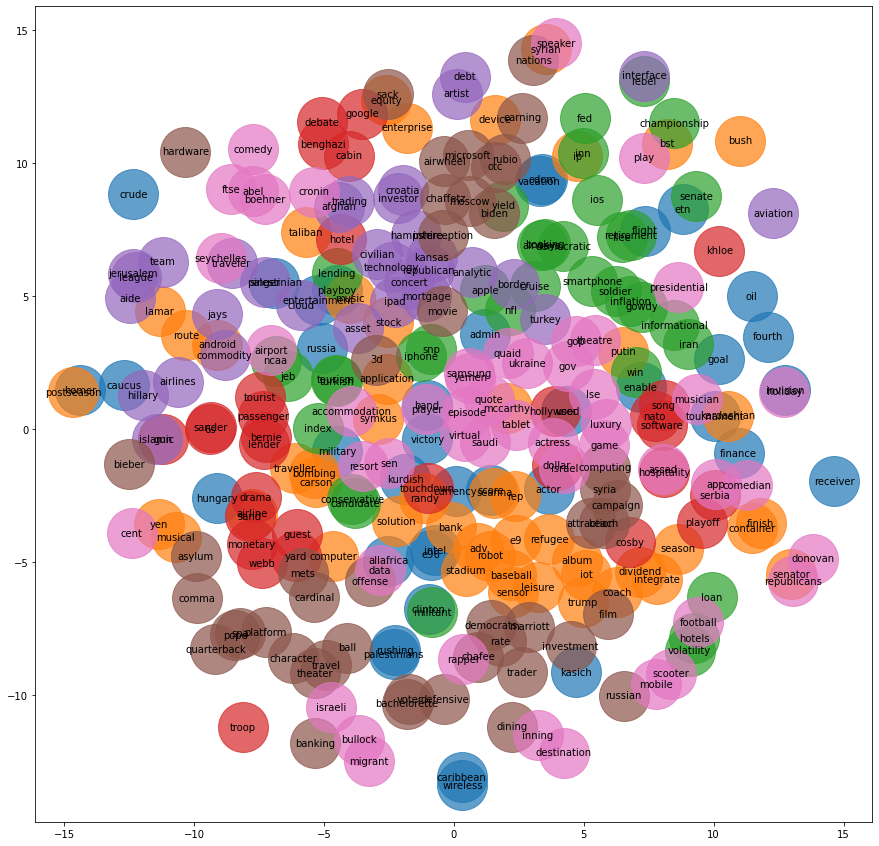

In [29]:
# Plot with matplotlib for fast overview
if True:
    fig, ax = plt.subplots(figsize=(15,15))
    for cluster in clusters:
        x = [i[0] for i in cluster.T[1]]
        y = [i[1] for i in cluster.T[1]]
        ax.plot(x, y, marker='o', ms=50, alpha=0.7, linestyle='none')
        for word, vec in cluster:
            plt.annotate(word, (vec[0], vec[1]), ha='center', va='center', size=10)
